## Initial Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Import time series data: Daily Temperature


In [2]:
data_daily_temp = pd.read_csv('Source Data/Daily+temperature+data.csv')

### Splitting the data into train and test data

In [3]:
train_len = 511
train = data_daily_temp[0:train_len]
test = data_daily_temp[train_len:]
test

,Date,Temperature(Min)
511,5/27/2018,8.2
512,5/28/2018,6.1
513,5/29/2018,4.5
514,5/30/2018,6.1
515,5/31/2018,9.8
...,...,...
725,12/27/2018,14.0
726,12/28/2018,13.6
727,12/29/2018,13.5
728,12/30/2018,15.7


## Simple Exponential Smoothing

In [4]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temperature(Min)'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(220)

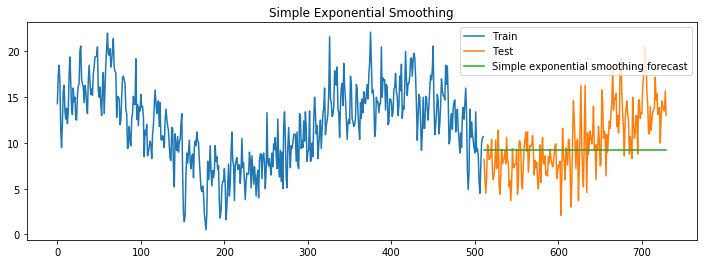

In [5]:
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing')
plt.show()

## Calculate RMSE and MAPE to evaulate forecast - Simple exponential smoothing method

In [7]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'],y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_ses['ses_forecast'])/test['Temperature(Min)'])*100,2)

results = pd.DataFrame({'Method': ['Simple exponential smoothing method'], 'RMSE': [rmse], 'MAPE': [mape]})
results

,Method,RMSE,MAPE
0,Simple exponential smoothing method,3.56,30.24


## Holt's Exponential Smoothing Technique

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']), seasonal_periods=12, trend='additive', seasonal=None)
#As the trend is linear, hence, using additive
# The parameter needs an array and np.asarry() converts the dataFrame into an array
model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(219)
y_hat_holt

{'smoothing_level': 0.5, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 14.3, 'initial_slope': 3.099999999999998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


,Date,Temperature(Min),holt_forecast
511,5/27/2018,8.2,10.013934
512,5/28/2018,6.1,10.003336
513,5/29/2018,4.5,9.992737
514,5/30/2018,6.1,9.982139
515,5/31/2018,9.8,9.971541
...,...,...,...
725,12/27/2018,14.0,7.745885
726,12/28/2018,13.6,7.735286
727,12/29/2018,13.5,7.724688
728,12/30/2018,15.7,7.714090


## Calculate RMSE and MAPE - Holt's exponential smoothing method

In [10]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_holt['holt_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt\'s exponential smoothing method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results,tempResults])
results = results[['Method', 'MAPE', 'RMSE']]
results

,Method,MAPE,RMSE
0,Simple exponential smoothing method,30.24,3.56
0,Holt's exponential smoothing method,34.17,4.11


## Holt Winter's Additive Method with Trend and Seasonality

In [11]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']), seasonal_periods=30, trend='add',seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.6746181790382475, 'smoothing_slope': 2.9104944726839204e-25, 'smoothing_seasonal': 1.3135682334928428e-24, 'damping_slope': nan, 'initial_level': 12.385428247523706, 'initial_slope': 5.472519563107773e-23, 'initial_seasons': array([3.06576585, 2.57167561, 2.59347279, 3.1032156 , 2.57753832,
       2.39890865, 2.50841099, 3.15923703, 3.31009357, 2.99042322,
       3.07098738, 2.81638854, 1.82038689, 2.77133564, 2.96935768,
       2.99683318, 1.94766889, 2.75726549, 2.45511863, 1.77655286,
       1.9980976 , 2.83114692, 1.658501  , 0.96252584, 1.82557137,
       1.82975108, 2.09879099, 2.71482524, 3.23098637, 3.24699864]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


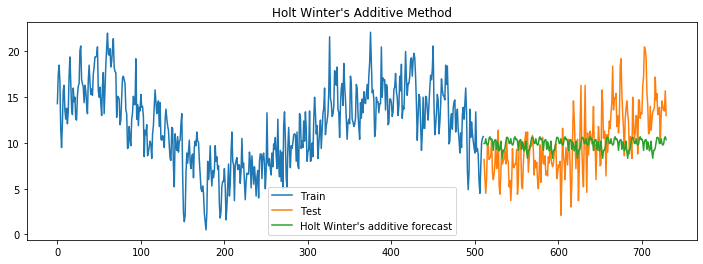

In [12]:
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_hwa['hwa_forecast'], label='Holt Winter\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winter\'s Additive Method')
plt.show()

## Calculate RMSE and MAPE to evaluate forecast - Holt Winter's additive method

In [13]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_hwa['hwa_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method': ['Holt Winter\'s additive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = pd.concat([results,tempResults])
results = results[['Method', 'MAPE', 'RMSE']]
results

,Method,MAPE,RMSE
0,Simple exponential smoothing method,30.24,3.56
0,Holt's exponential smoothing method,34.17,4.11
0,Holt Winter's additive method,32.83,3.50
